In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dffam=pd.read_csv("C:/Users/YOGESWARI/Downloads/australian wild fire/fire_archive_M6_96619.csv")
dffav=pd.read_csv("C:/Users/YOGESWARI/Downloads/australian wild fire/fire_archive_V1_96617.csv")
dffnm=pd.read_csv("C:/Users/YOGESWARI/Downloads/australian wild fire/fire_nrt_M6_96619.csv")
dffnv=pd.read_csv("C:/Users/YOGESWARI/Downloads/australian wild fire/fire_nrt_V1_96617.csv")

In [4]:
df_merged = pd.concat([dffav,dffnv],sort=True)
data = df_merged
data.head()

,acq_date,acq_time,bright_ti4,bright_ti5,confidence,daynight,frp,instrument,latitude,longitude,satellite,scan,track,type,version
0,2019-08-01,246,326.5,290.7,n,NaN,5.8,VIIRS,-34.45902,150.88040,N,0.60,0.71,3.0,1
1,2019-08-01,247,367.0,291.9,h,NaN,10.4,VIIRS,-31.70724,151.07191,N,0.56,0.69,0.0,1
2,2019-08-01,247,325.2,292.7,n,NaN,5.6,VIIRS,-31.39626,149.65253,N,0.68,0.74,0.0,1
3,2019-08-01,247,347.8,287.6,n,NaN,9.1,VIIRS,-30.39774,152.06432,N,0.48,0.65,0.0,1
4,2019-08-01,247,350.7,292.3,n,NaN,9.4,VIIRS,-31.20248,151.89766,N,0.50,0.66,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141035 entries, 0 to 956256
Data columns (total 15 columns):
acq_date      1141035 non-null object
acq_time      1141035 non-null int64
bright_ti4    1141035 non-null float64
bright_ti5    1141035 non-null float64
confidence    1141035 non-null object
daynight      956257 non-null object
frp           1141035 non-null float64
instrument    1141035 non-null object
latitude      1141035 non-null float64
longitude     1141035 non-null float64
satellite     1141035 non-null object
scan          1141035 non-null float64
track         1141035 non-null float64
type          184778 non-null float64
version       1141035 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 139.3+ MB


In [21]:
df_filter = data.filter(["latitude","longitude","acq_date","frp"])
df_filter.head()

,latitude,longitude,acq_date,frp
0,-34.45902,150.88040,2019-08-01,5.8
1,-31.70724,151.07191,2019-08-01,10.4
2,-31.39626,149.65253,2019-08-01,5.6
3,-30.39774,152.06432,2019-08-01,9.1
4,-31.20248,151.89766,2019-08-01,9.4


In [22]:
df = df_filter[df_filter['acq_date']>='2019-11-01']
df.head()

,latitude,longitude,acq_date,frp
141333,-32.37430,146.74370,2019-11-01,4.5
141334,-41.29750,147.10437,2019-11-01,2.6
141335,-32.22208,145.85284,2019-11-01,3.5
141336,-41.30091,147.10515,2019-11-01,2.6
141337,-32.21937,145.84805,2019-11-01,3.9


In [32]:
data_topaffected = df.sort_values(by='frp',ascending=False).head(10)
data_topaffected

,latitude,longitude,acq_date,frp
942932,-36.97858,146.71938,2020-01-08,10717.2
943193,-35.89541,136.54585,2020-01-08,5611.8
943038,-35.79238,136.59879,2020-01-08,4948.8
897877,-36.77020,148.00307,2020-01-04,4156.6
943196,-35.89769,136.55919,2020-01-08,3736.3
943092,-35.88688,137.07683,2020-01-08,3501.9
943091,-35.88832,137.08549,2020-01-08,3497.9
943194,-35.89618,136.55032,2020-01-08,3372.0
943195,-35.89693,136.55476,2020-01-08,3372.0
943050,-35.80969,136.60056,2020-01-08,3282.1


In [37]:
dfdate = df[['acq_date','frp']].set_index('acq_date')
dfdate_highest = dfdate.groupby('acq_date').sum().sort_values(by='frp',ascending=False)
dfdate_highest.head(10)

,frp
acq_date,
2020-01-04,1653384.1
2019-12-30,883598.6
2019-11-08,542117.9
2019-12-29,529525.8
2020-01-02,520606.0
2019-12-21,344399.0
2019-12-19,333303.5
2020-01-03,317426.7
2020-01-01,312001.9


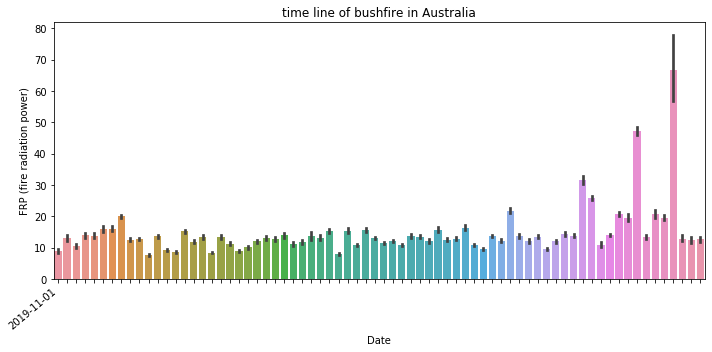

In [44]:
plt.figure(figsize=(10,5))
sns.set_palette("pastel")
ax = sns.barplot(x='acq_date',y='frp',data=df)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Date")
plt.ylabel('FRP (fire radiation power)')
plt.title("time line of bushfire in Australia")
plt.tight_layout()

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

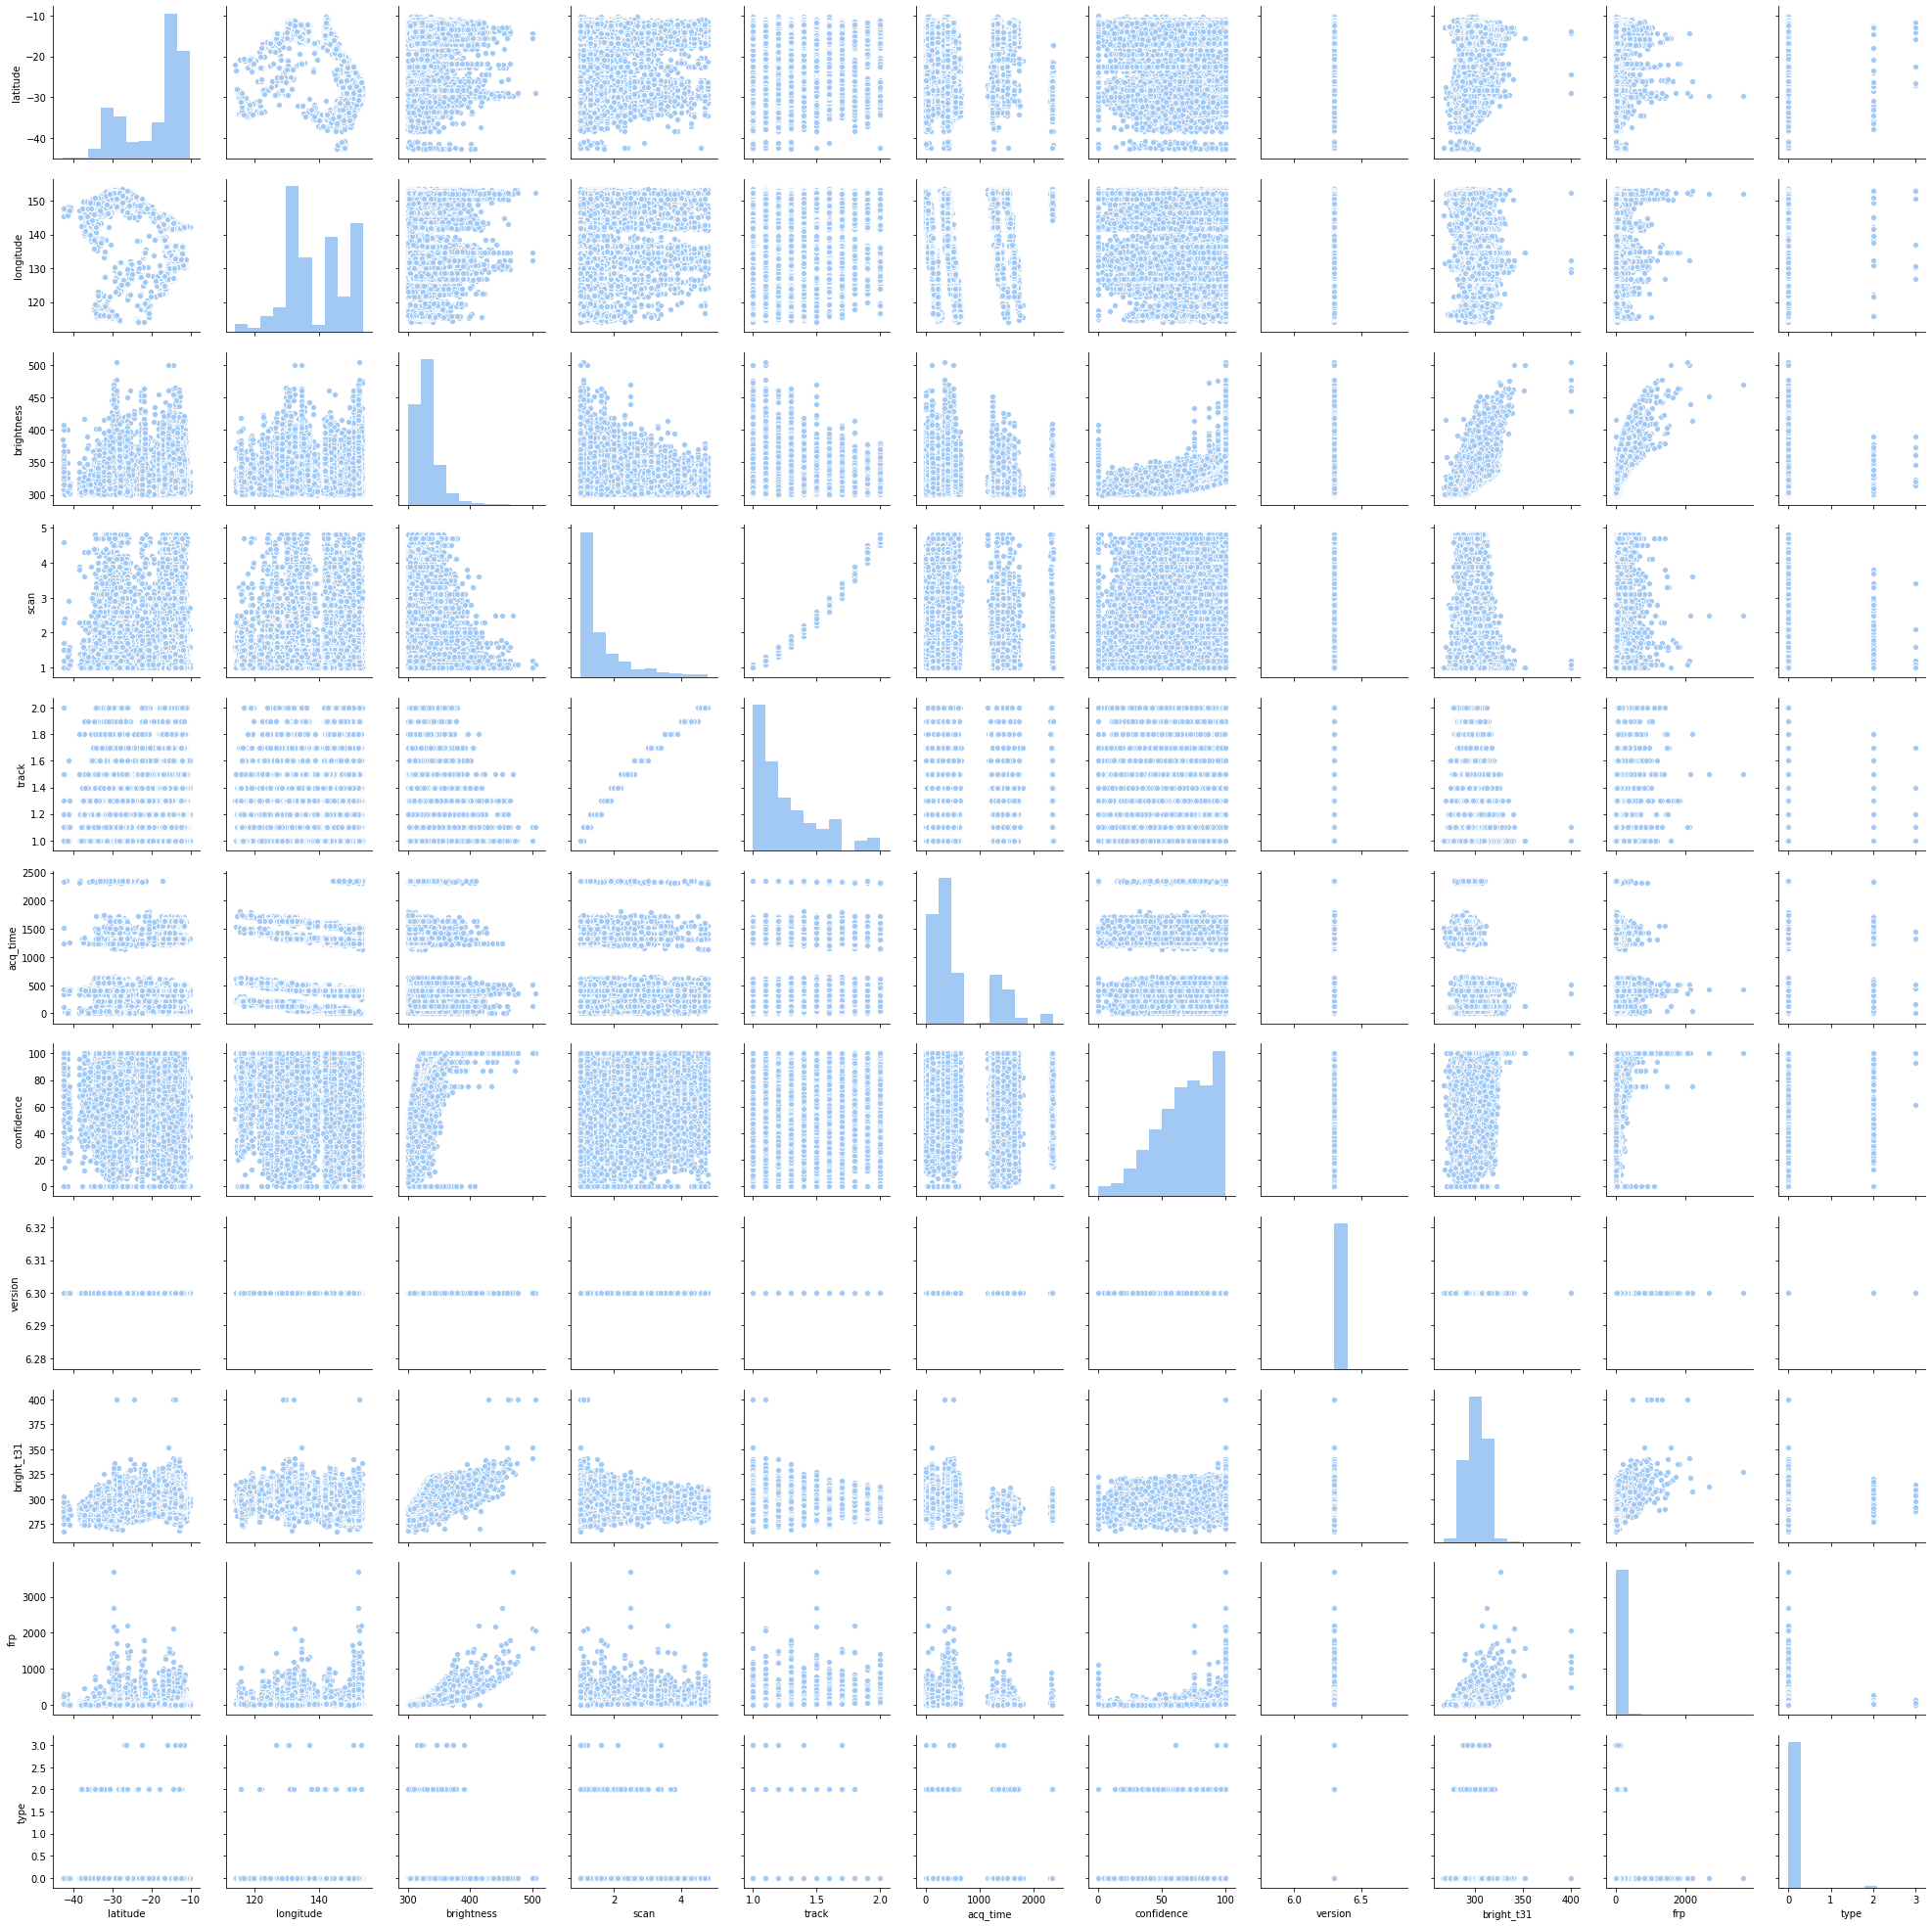

In [48]:
sns.pairplot(data=dffam)